In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/Rohan_dataset(age).csv")
df


,Name,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,Aarav,30,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,Vivaan,40,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,Vihaan,48,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,Kiara,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,Kiara,32,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Aadhya,23,Business,Single,Graduate,0,No,No,No,2400000,0,2400000,SUV,1600000
95,Aarav,50,Salaried,Married,Post Graduate,3,No,No,Yes,3800000,1300000,5100000,SUV,1600000
96,Myra,50,Business,Married,Graduate,2,Yes,Yes,No,2200000,0,2200000,Ciaz,1100000
97,Ishaan,56,Salaried,Married,Post Graduate,2,No,No,Yes,2700000,1300000,4000000,Creata,1500000


In [ ]:
df.head()

,Name,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,Aarav,30,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,Vivaan,40,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,Vihaan,48,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,Kiara,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,Kiara,32,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000


In [ ]:
df.describe()

,Age,No of Dependents,Salary,Wife Salary,Total Salary,Price
count,99.000000,99.000000,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01
mean,36.636364,2.181818,1.736364e+06,5.343434e+05,2.270707e+06,1.194040e+06
std,7.354652,1.335265,6.736217e+05,6.054450e+05,1.050777e+06,4.376955e+05
min,22.000000,0.000000,2.000000e+05,0.000000e+00,2.000000e+05,1.100000e+05
25%,31.000000,2.000000,1.300000e+06,0.000000e+00,1.550000e+06,8.000000e+05
50%,37.000000,2.000000,1.600000e+06,5.000000e+05,2.100000e+06,1.200000e+06
75%,40.000000,3.000000,2.200000e+06,9.000000e+05,2.700000e+06,1.500000e+06
max,56.000000,4.000000,3.800000e+06,2.100000e+06,5.200000e+06,3.000000e+06


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              99 non-null     object
 1   Age               99 non-null     int64 
 2   Profession        99 non-null     object
 3   Marrital Status   99 non-null     object
 4   Education         99 non-null     object
 5   No of Dependents  99 non-null     int64 
 6   Personal loan     99 non-null     object
 7   House Loan        99 non-null     object
 8   Wife Working      99 non-null     object
 9   Salary            99 non-null     int64 
 10  Wife Salary       99 non-null     int64 
 11  Total Salary      99 non-null     int64 
 12  Make              99 non-null     object
 13  Price             99 non-null     int64 
dtypes: int64(6), object(8)
memory usage: 11.0+ KB


In [ ]:
df.rename(columns={'Personal loan':'Car_Loan'},inplace=True)
df.rename(columns={'Price':'EV_Price'},inplace=True)
df.head()

,Name,Age,Profession,Marrital Status,Education,No of Dependents,Car_Loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,EV_Price
0,Aarav,30,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,Vivaan,40,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,Vihaan,48,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,Kiara,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,Kiara,32,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000


In [ ]:

df.columns

Index(['Name', 'Age', 'Profession', 'Marrital Status', 'Education',
       'No of Dependents', 'Car_Loan', 'House Loan', 'Wife Working', 'Salary',
       'Wife Salary', 'Total Salary', 'Make', 'EV_Price'],
      dtype='object')

In [ ]:
for i in df.columns:
  print(i, ':' , df[i].unique())

Name : ['Aarav' 'Vivaan' 'Vihaan' 'Kiara' 'Reyansh' 'Myra' 'Riya' 'Ishaan'
 'Aadhya' 'Anaya']
Age : [30 40 48 41 32 27 35 31 34 38 36 29 52 25 23 28 37 39 43 46 53 44 45 26
 42 47 22 50 56]
Profession : ['Salaried' 'Business']
Marrital Status : ['Single' 'Married']
Education : ['Post Graduate' 'Graduate']
No of Dependents : [0 2 4 3]
Car_Loan : ['Yes' 'No']
House Loan : ['No' 'Yes']
Wife Working : ['No' 'Yes' 'm']
Salary : [ 800000 1400000 1800000 1600000  900000 1200000 2000000 1300000 2500000
 1700000 1100000 1900000 2100000 2400000 2200000  200000 1500000 2700000
 2900000 3100000 2600000 2300000 2800000 3800000]
Wife Salary : [      0  600000  800000  700000  400000 2000000  500000 1000000 1100000
  900000 1300000 1400000 1800000 2100000]
Total Salary : [ 800000 2000000 1800000 2200000 2600000  900000 1400000 1900000 1700000
 1300000 4500000 2500000 2400000 2900000 1600000 2700000 1100000 2100000
 3000000 3700000 2300000 3600000  200000 3100000 4300000 3800000 4700000
 1200000 15000

In [ ]:
#check for null values
df.isnull().sum()

,0
Name,0
Age,0
Profession,0
Marrital Status,0
Education,0
No of Dependents,0
Car_Loan,0
House Loan,0
Wife Working,0
Salary,0


**Exploratory Data Analysis**

<Axes: xlabel='Age', ylabel='Salary'>

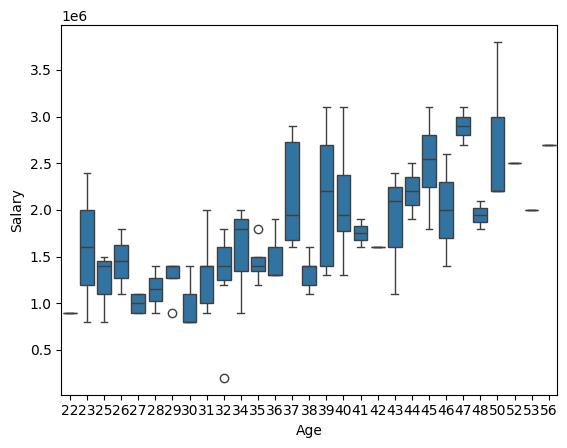

In [ ]:
sns.boxplot( x = 'Age' , y= 'Salary', data = df)

In [ ]:
print(df.columns.tolist())

['Name', 'Age', 'Profession', 'Marrital Status', 'Education', 'No of Dependents', 'Car_Loan', 'House Loan', 'Wife Working', 'Salary', 'Wife Salary', 'Total Salary', 'Make', 'EV_Price']


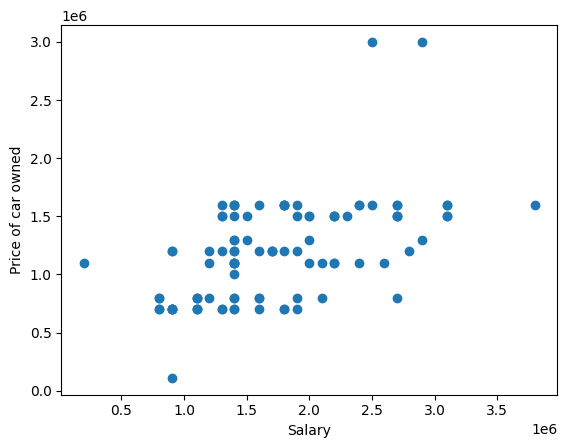

In [ ]:
plt.xlabel('Salary')
plt.ylabel('Price of car owned')
plt.scatter(df['Salary'],df['EV_Price'])

In [ ]:
print(df.columns.tolist())

['Name', 'Age', 'Profession', 'Marrital Status', 'Education', 'No of Dependents', 'Car_Loan', 'House Loan', 'Wife Working', 'Salary', 'Wife Salary', 'Total Salary', 'Make', 'EV_Price']


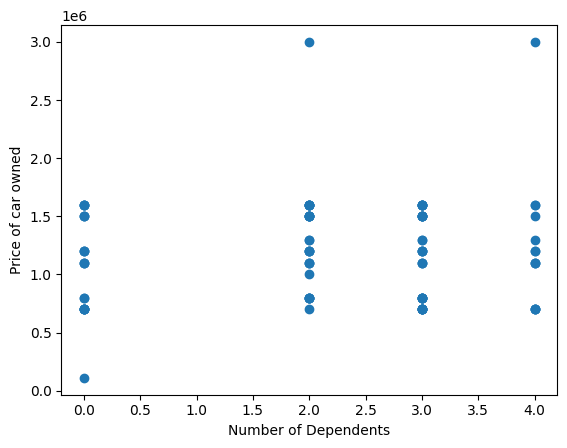

In [ ]:
plt.xlabel('Number of Dependents')
plt.ylabel('Price of car owned')
plt.scatter(df['No of Dependents'],df['EV_Price'])

<Figure size 1500x700 with 0 Axes>

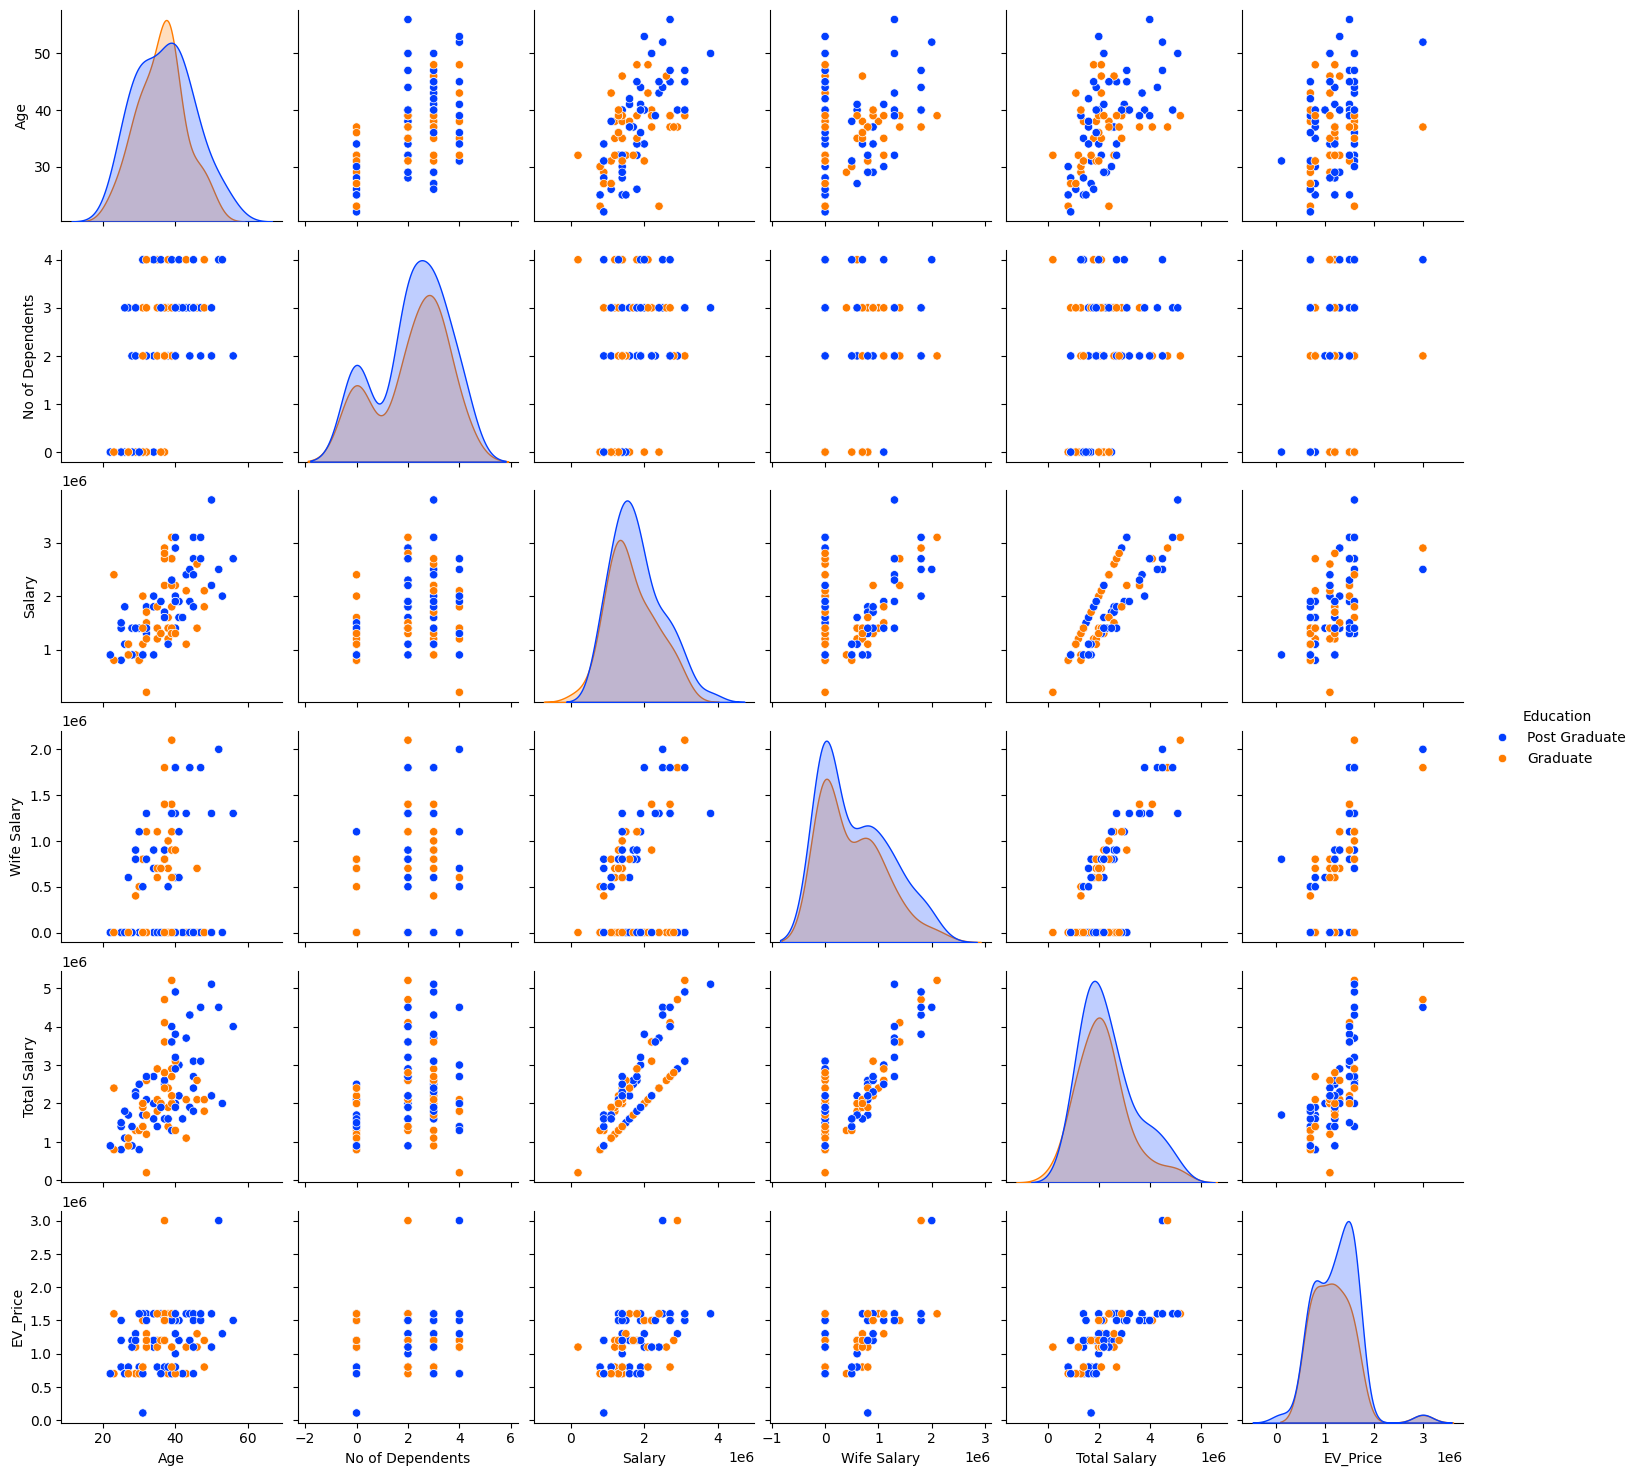

In [ ]:
plt.figure(1,figsize=(15,7))
sns.pairplot(df , hue = 'Education', palette = 'bright')

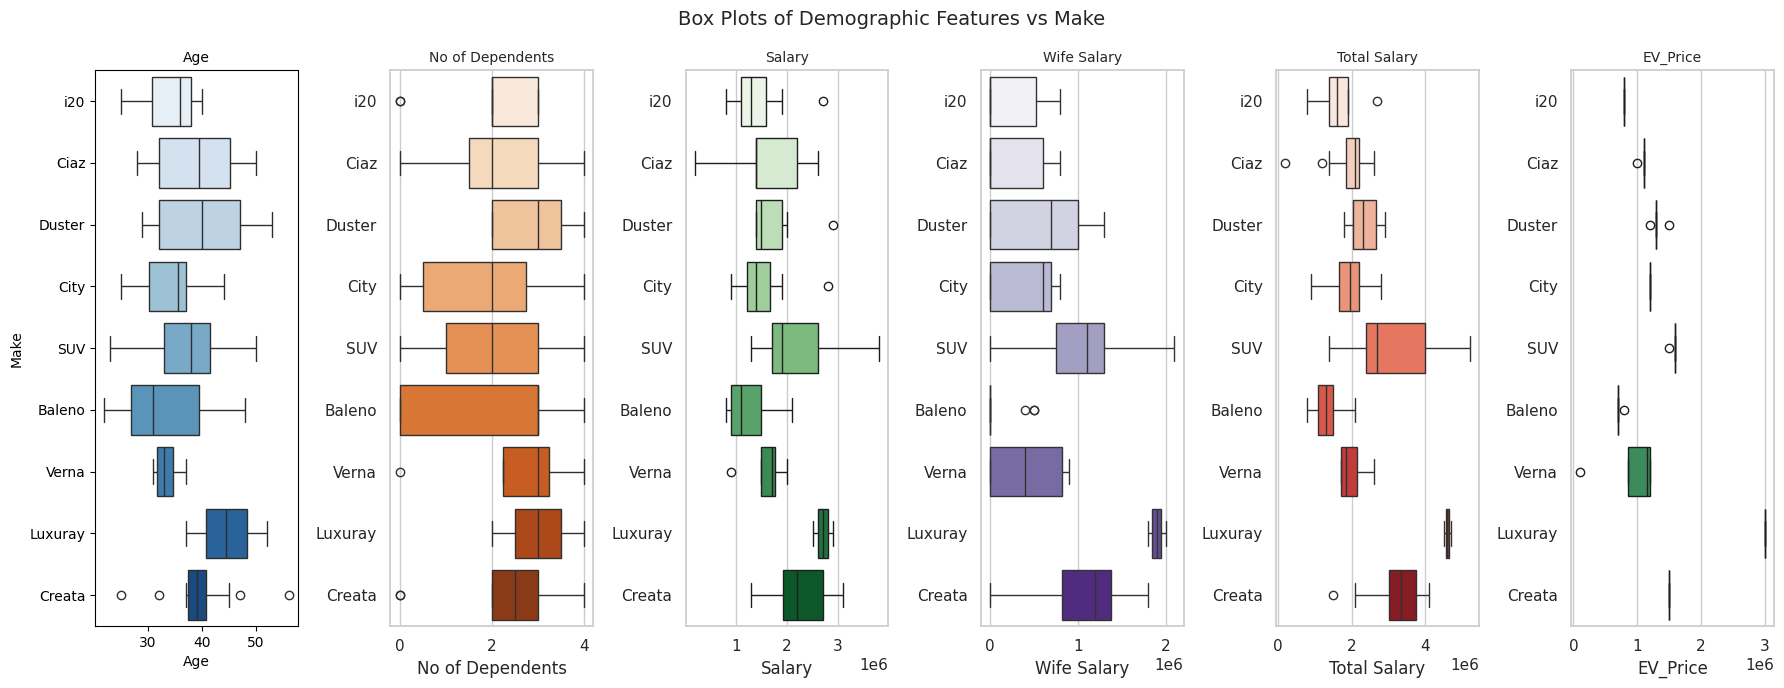

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(1, figsize=(18, 7))
n = 0


columns = ['Age', 'No of Dependents', 'Salary', 'Wife Salary', 'Total Salary', 'EV_Price']


colors = ['Blues', 'Oranges', 'Greens', 'Purples', 'Reds', 'BuGn']

for cols, color in zip(columns, colors):
    n += 1
    plt.subplot(1, 6, n)
    sns.set(style='whitegrid')
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.boxplot(x=cols, y='Make', data=df, palette=color)
    plt.ylabel("Make" if n == 1 else '')
    plt.title(cols, fontsize=10)

plt.suptitle('Box Plots of Demographic Features vs Make', fontsize=14)
plt.tight_layout()
plt.show()

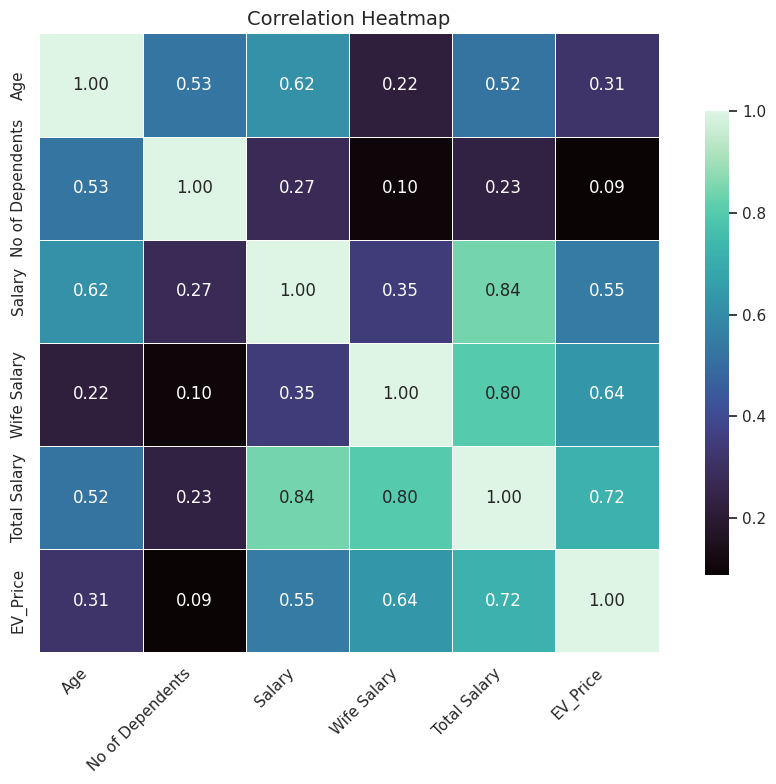

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


corr = df.corr(numeric_only=True)


plt.figure(figsize=(10, 8))
sns.set(style="white")

heatmap = sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap='mako',
    square=True,
    cbar_kws={"shrink": 0.75},
    linewidths=0.5,
    linecolor='white'
)


plt.xticks(rotation=45, ha='right')
plt.title("Correlation Heatmap", fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
df.dtypes

,0
Name,object
Age,int64
Profession,object
Marrital Status,object
Education,object
No of Dependents,int64
Car_Loan,object
House Loan,object
Wife Working,object
Salary,int64


In [ ]:
dfe = df.iloc[:,df.columns!='Make']
dfe.head()


,Name,Age,Profession,Marrital Status,Education,No of Dependents,Car_Loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,EV_Price
0,Aarav,30,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,800000
1,Vivaan,40,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,1000000
2,Vihaan,48,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,1200000
3,Kiara,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,1200000
4,Kiara,32,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,1600000


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Make sure you have created a LabelEncoder instance
le = LabelEncoder()

# Apply Label Encoding on multiple categorical columns
dfe['Profession'] = le.fit_transform(dfe['Profession'])
dfe['Marrital Status'] = le.fit_transform(dfe['Marrital Status'])
dfe['Education'] = le.fit_transform(dfe['Education'])
dfe['Car_Loan'] = le.fit_transform(dfe['Car_Loan'])
dfe['House Loan'] = le.fit_transform(dfe['House Loan'])
dfe['Wife Working'] = le.fit_transform(dfe['Wife Working'])


In [ ]:
dfe.head()

,Name,Age,Profession,Marrital Status,Education,No of Dependents,Car_Loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,EV_Price
0,Aarav,30,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,800000
1,Vivaan,40,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,1000000
2,Vihaan,48,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,1200000
3,Kiara,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,1200000
4,Kiara,32,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,1600000


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Step 0: Clean column names
dfe.columns = dfe.columns.str.strip()

# Step 1: Identify columns properly
categorical_cols = ['Name', 'Profession', 'Marrital Status', 'Education', 'Wife Working', 'Car_Loan', 'House Loan']
numeric_cols = ['Age', 'No of Dependents', 'Salary', 'Wife Salary', 'Total Salary', 'EV_Price']

# Step 2: Encode all categorical columns
dfe_encoded = dfe.copy()
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    dfe_encoded[col] = le.fit_transform(dfe[col].astype(str))  # Ensure consistent string format
    label_encoders[col] = le

# Step 3: Scale numeric columns
scaler = StandardScaler()
dfe_encoded[numeric_cols] = scaler.fit_transform(dfe_encoded[numeric_cols])

# Step 4: Final DataFrame
dfe_scaled = dfe_encoded.copy()

# Step 5: Convert to NumPy array
x = dfe_scaled.to_numpy()

# Optional: Show the first few rows
dfe_scaled





,Name,Age,Profession,Marrital Status,Education,No of Dependents,Car_Loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,EV_Price
0,1,-0.906928,1,1,1,-1.642313,1,0,0,-1.397118,-0.887055,-1.406760,-0.904843
1,9,0.459676,1,0,1,-0.136859,1,1,1,-0.501877,0.108995,-0.258937,-0.445579
2,8,1.552958,0,0,0,1.368594,1,1,0,0.094950,-0.887055,-0.450240,0.013685
3,4,0.596336,0,0,1,0.615867,0,0,1,-0.203464,0.108995,-0.067633,0.013685
4,4,-0.633607,1,0,1,-0.136859,1,0,1,0.094950,0.441012,0.314975,0.932213
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,0,-1.863550,0,1,0,-1.642313,0,0,0,0.990190,-0.887055,0.123671,0.932213
95,1,1.826279,1,0,1,0.615867,0,0,1,3.079085,1.271054,2.706274,0.932213
96,5,1.826279,0,0,0,-0.136859,1,1,0,0.691777,-0.887055,-0.067633,-0.215947
97,3,2.646241,1,0,1,-0.136859,0,0,1,1.437811,1.271054,1.654102,0.702581


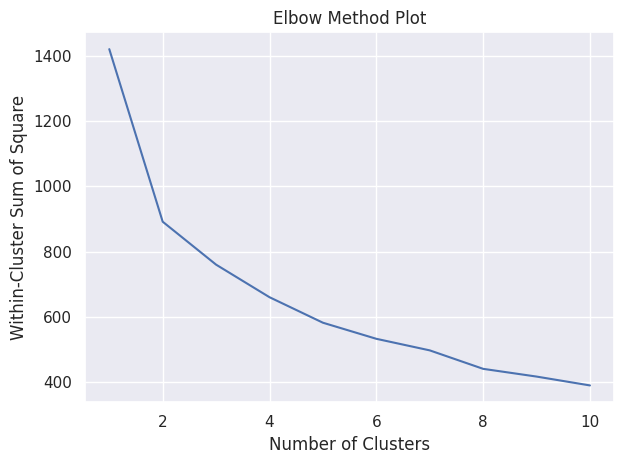

In [ ]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                    max_iter = 300, n_init = 10,random_state = 0)
    kmeans.fit(dfe_scaled)
    wcss.append(kmeans.inertia_)
sns.set_style("darkgrid")
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Square') # Within cluster sum of squares
plt.tight_layout()
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++',
                    max_iter = 300, n_init = 10,random_state = 42)
kmeans.fit(dfe_scaled)

KMeans(n_clusters=4, n_init=10, random_state=42)

In [ ]:
y = kmeans.predict(dfe_scaled)
y_df = pd.DataFrame(y,columns=['Class'])
final_data = pd.concat([df,y_df],axis=1)
final_data

,Name,Age,Profession,Marrital Status,Education,No of Dependents,Car_Loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,EV_Price,Class
0,Aarav,30,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000,1
1,Vivaan,40,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000,0
2,Vihaan,48,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000,0
3,Kiara,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000,3
4,Kiara,32,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Aadhya,23,Business,Single,Graduate,0,No,No,No,2400000,0,2400000,SUV,1600000,1
95,Aarav,50,Salaried,Married,Post Graduate,3,No,No,Yes,3800000,1300000,5100000,SUV,1600000,3
96,Myra,50,Business,Married,Graduate,2,Yes,Yes,No,2200000,0,2200000,Ciaz,1100000,0
97,Ishaan,56,Salaried,Married,Post Graduate,2,No,No,Yes,2700000,1300000,4000000,Creata,1500000,3


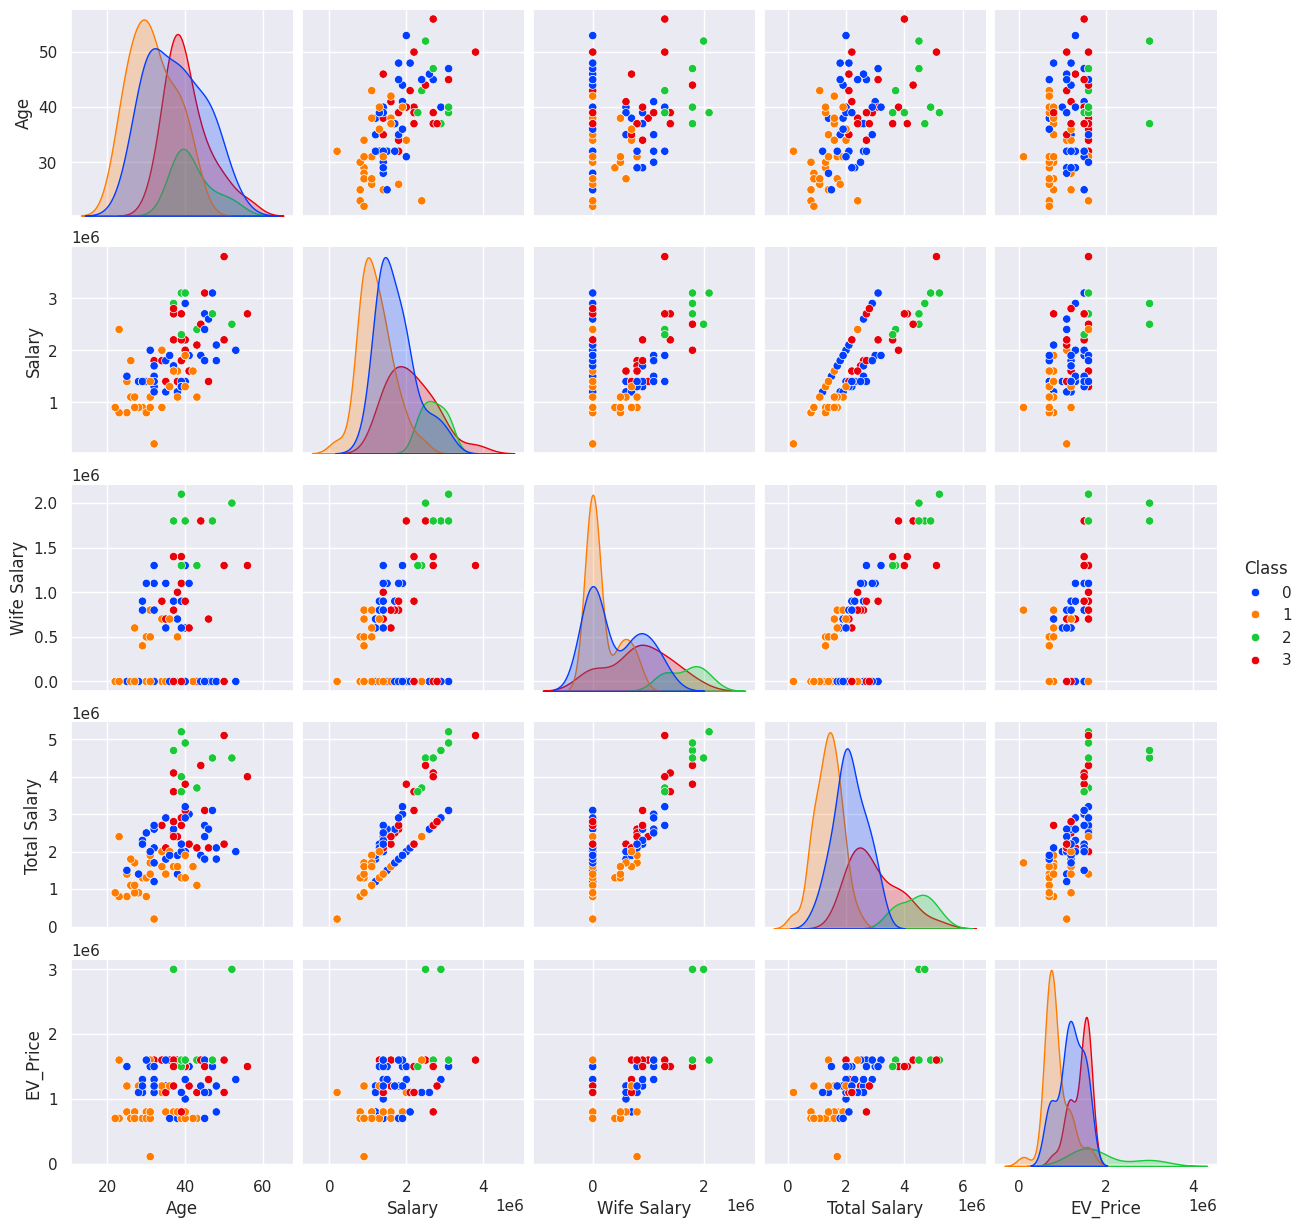

In [ ]:
sns.pairplot(final_data,x_vars = ['Age','Salary', 'Wife Salary','Total Salary','EV_Price'], y_vars = ['Age','Salary', 'Wife Salary','Total Salary','EV_Price'], hue='Class', palette= 'bright')


In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                    max_iter = 300, n_init = 10,random_state = 42)
kmeans.fit(dfe_scaled)

KMeans(n_clusters=3, n_init=10, random_state=42)

In [ ]:
y = kmeans.predict(dfe_scaled)
y_df = pd.DataFrame(y,columns=['Class'])
final_data = pd.concat([df,y_df],axis=1)

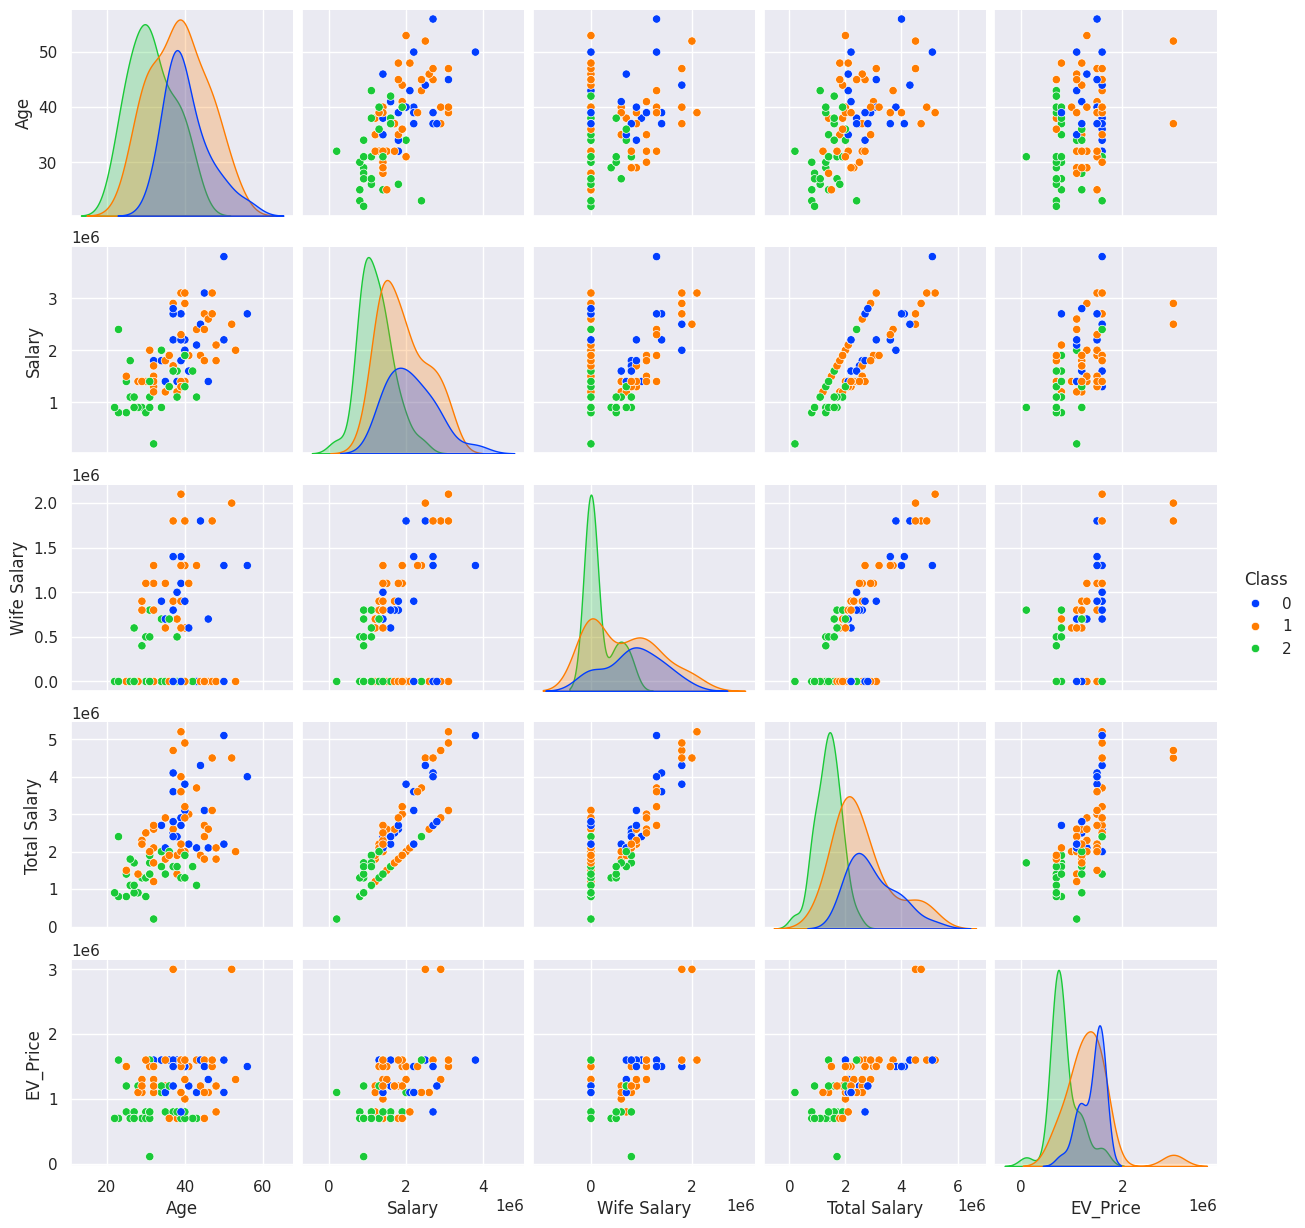

In [ ]:
sns.pairplot(final_data,x_vars = ['Age','Salary', 'Wife Salary','Total Salary','EV_Price'], y_vars = ['Age','Salary', 'Wife Salary','Total Salary','EV_Price'], hue='Class', palette= 'bright')



Thus, we see that we can get a more meaningful analysis for k = 3 Let's see the characteristics of every cluster:

Cluster 1 (Orange): Prefer low to moderately priced Electric vehicles

Age group 20-30 Moderate to average salary Wife's salary - Low

Cluster 2 (green) : Prefer low to moderately priced Electric vehicles

Age group 30-45 Average to high salary Wife's salary - low to

Cluster 3 (Blue) : Prefer moderate priced Electric vehicles and experiment with the high priced segment.

Age group 30-45 Average to very high Wife's salary - high

Notable findings:

Moderately priced EVs are the most preferred across all the classes/clusters.

Most purchasing acitivity is seen in the age range of 26-38.

Regardless of even high salaries, average to low price-ranged cars are being preferred.

Personal and home loans do not seem to have any significant impact on EV purchasing patterns.

We see the people buying over a range of prices when it comes to Verna, whereas in case of other brands, probably some specefic models are being preferred.

We observe high correlation between total salary (salary + wife salary) and price.


**Additional analysis**

In [ ]:
import pandas as pd

# Load CSV file
df1 = pd.read_csv('/content/EV Maker by Place.csv')

# Clean column names (remove leading/trailing spaces)
df1.columns = df1.columns.str.strip()

# Convert price to INR (10e3)
if 'PriceEuro' in df1.columns:
    df1['inr(10e3)'] = pd.to_numeric(df1['PriceEuro'], errors='coerce') * 0.08320

# Replace 'RapidCharge' values
if 'RapidCharge' in df1.columns:
    df1['RapidCharge'] = df1['RapidCharge'].replace({'No': 0, 'Yes': 1})

# Show first few rows
print(df1.head())

            EV Maker        Place        State
0        Tata Motors         Pune  Maharashtra
1  Mahindra Electric    Bengaluru    Karnataka
2       Ather Energy    Bengaluru    Karnataka
3      Hero Electric    New Delhi        Delhi
4       Ola Electric  Krishnagiri   Tamil Nadu


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   EV Maker  62 non-null     object
 1   Place     62 non-null     object
 2   State     62 non-null     object
dtypes: object(3)
memory usage: 1.6+ KB


In [ ]:
df1.isna().sum()

,0
EV Maker,0
Place,0
State,0


In [ ]:
print(df1.columns)

Index(['EV Maker', 'Place', 'State'], dtype='object')


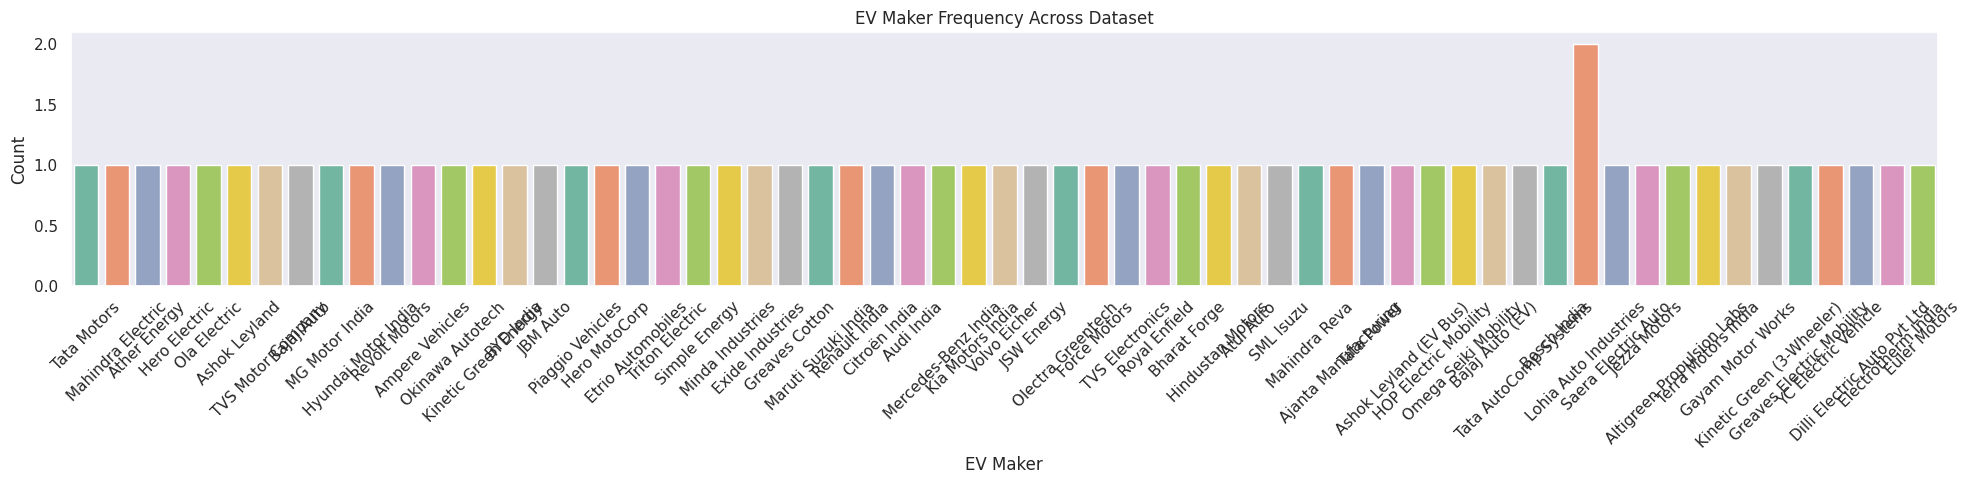

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,5))
sns.countplot(x='EV Maker', data=df1, palette='Set2')
plt.grid(axis='y')
plt.title('EV Maker Frequency Across Dataset')
plt.xlabel('EV Maker')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

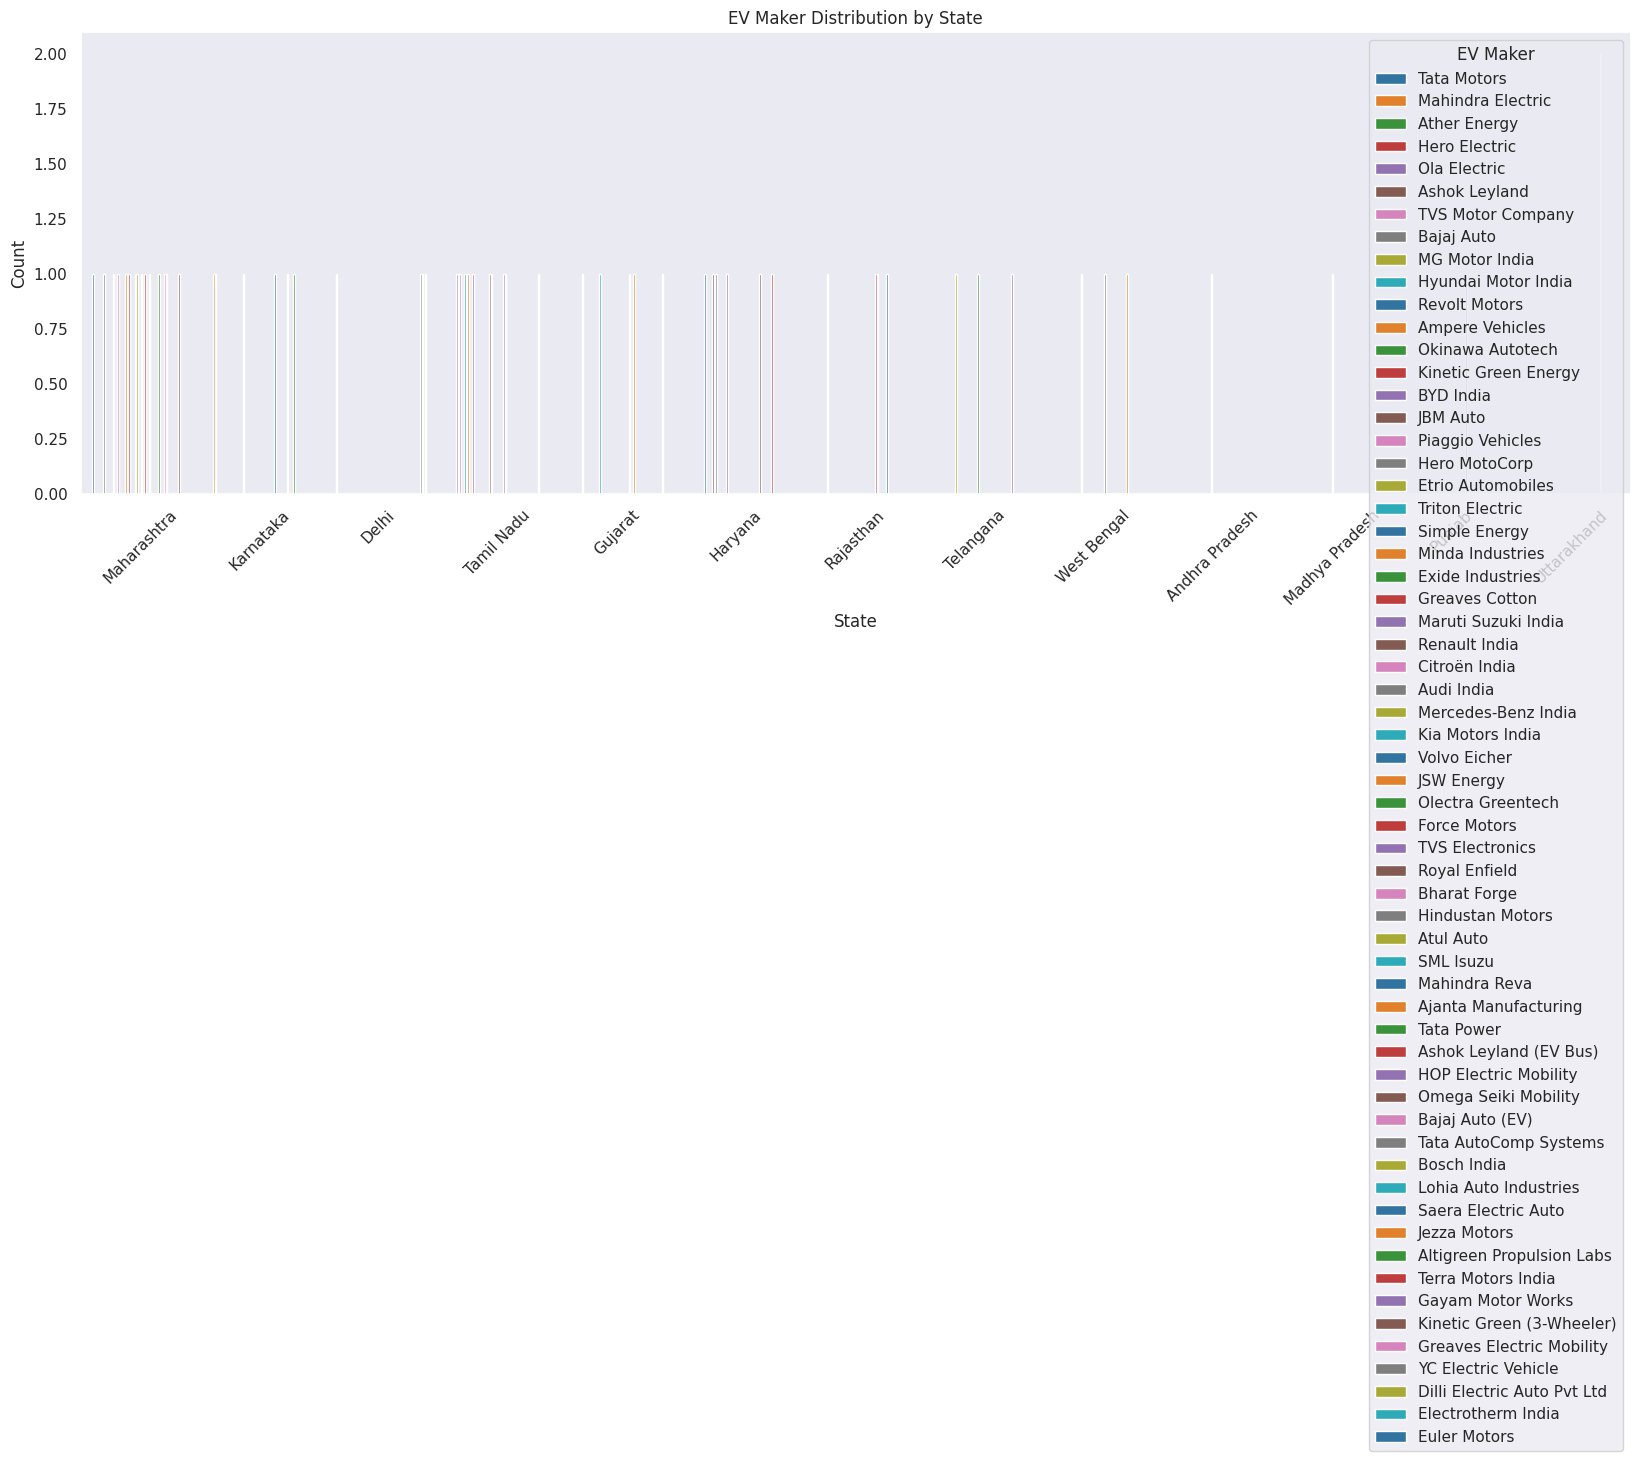

In [ ]:
plt.figure(figsize=(20,6))
sns.countplot(x='State', hue='EV Maker', data=df1, palette='tab10')
plt.title('EV Maker Distribution by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')
plt.show()